In [3]:
#!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error,r2_score


In [4]:
df=pd.read_csv("cleaned_train.csv")
df.head()

,Unnamed: 0,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,0,6,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,208500
1,1,5,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,181500
2,2,6,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,223500
3,3,6,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,140000
4,4,7,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,250000


In [5]:
# Split data into features and target variable
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize XGBRegressor
xgb = XGBRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10,refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Build XGBoost regressor model using the best parameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = best_xgb.predict(X_test)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_

[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.

In [7]:
mse = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.11427761108895008
Mean Squared Error: 0.025811837991143574
R-squared: 0.7896725567737204


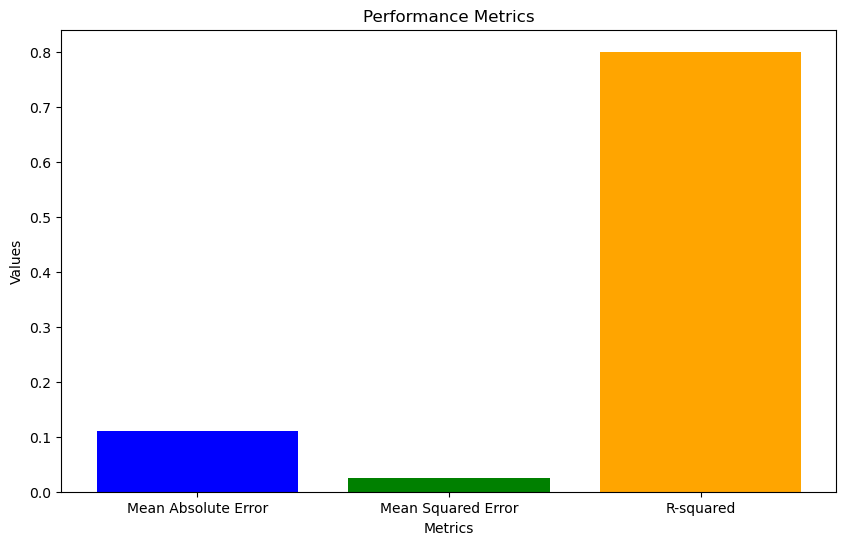

In [29]:
import matplotlib.pyplot as plt
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
values = [mae, mse, r2]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.savefig("XGB.png")
plt.show()
